### Titanic Survival Prediction

You are a data scientist / AI engineer working on a binary classification problem to predict the survival of passengers from the Titanic crash. You have been provided with a dataset named **`"titanic.csv"`** which includes various features of passengers to predict whether they survived or not. The dataset comprises the following columns:

- `passenger_id:` The unique identifier for each passenger.
- `name:` The name of the passenger.
- `p_class:` The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- `sex:` The gender of the passenger.
- `age:` The age of the passenger.
- `sib_sp:` The number of siblings or spouses the passenger had aboard the Titanic.
- `parch:` The number of parents or children the passenger had aboard the Titanic.
- `ticket:` The ticket number of the passenger.
- `fare:` The fare the passenger paid for the ticket.
- `cabin:` The cabin number where the passenger stayed.
- `embarked:` The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
- `survived:` Whether the passenger survived (1) or not (0).

Your task is to use this dataset to build and evaluate a `Gaussian Naive Bayes` model to predict whether a passenger survived based on their features. You will also evaluate the model's performance using precision, recall, and other classification metrics.

In [24]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

**Import Necessary Libraries**

In [25]:
# Import Necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

### Task 1: Data Preparation and Exploration

1. Import the data from the `"titanic.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.
5. Drop columns that do not add much value `(passenger_id, name, sib_sp, parch, ticket, cabin, embarked)`.
6. Visualize the distribution of the target variable `survived` and `p_class` using a bar chart.
7. Visualize the distribution of `sex` using a pie chart (percentage).
8. Visualize the distribution of `age` and `fare` using histograms.

In [6]:
# Step 1: Import the data from the "titanic.csv" file and store it in a variable df
df = pd.read_csv("../data/titanic.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of Rows and Columns ",df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

Number of Rows and Columns  (891, 12)


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
# Step 4: Check for any missing values in the dataset 
df.isna().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [10]:
# Step 5: Drop columns that do not add much value (passenger_id, name, sib_sp, parch, ticket, cabin, embarked)
df = df.drop(columns=[ 'passenger_id', 'name', 'sib_sp', 'parch', 'ticket', 'cabin', 'embarked'])

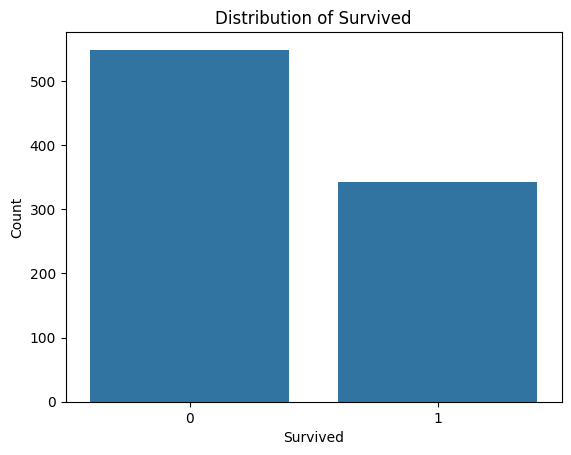

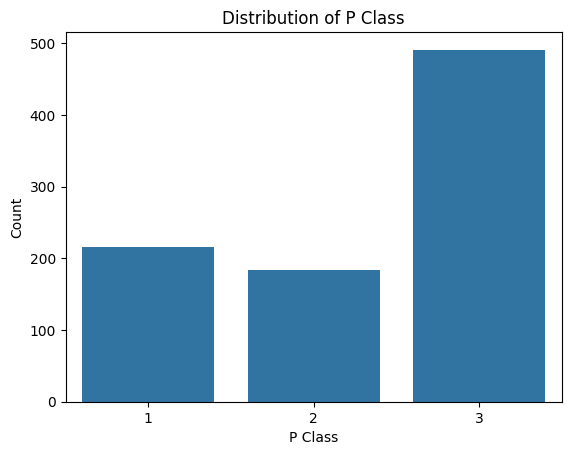

In [12]:
# Step 6: Visualize the distribution

#'survived'
sns.countplot(x='survived',data = df)
plt.title("Distribution of Survived")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 'p_class'
sns.countplot(x='p_class',data=df)
plt.title("Distribution of P Class")
plt.xlabel("P Class")
plt.ylabel("Count")
plt.show()

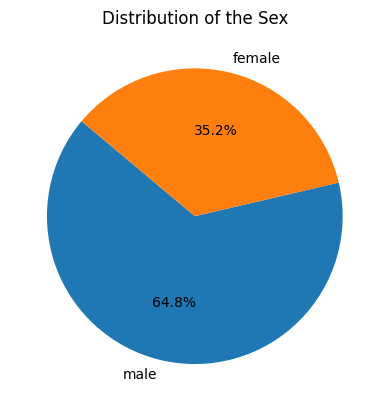

In [ ]:
# Step 7: Visualize the distribution of 'sex' using a pie chart (percentage)
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts,labels=sex_counts.index,autopct='%1.1f%%',startangle=140)
plt.title("Distribution of Sex")
plt.show()

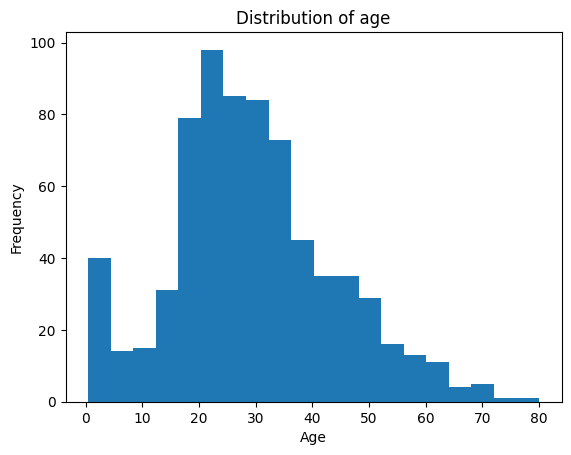

In [16]:
# Step 8: Visualize the distribution of 'age' using a histogram
df['age'].plot(kind='hist',bins=20,title='Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Step 9: Visualize the distribution of 'fare' using a histogram


### Task 2: Data Preprocessing

1. Fill in missing values in the `age and fare` columns with their median values.
2. Encode the sex column using one-hot encoding.
3. Standardize the fare column using StandardScaler.
4. Select the features `(p_class, sex, age, fare)` and the target variable `(survived)` for modeling.
5. Split the dataset into training and testing sets with a test size of 30%.

In [17]:
# Step 1: Fill in missing values in the 'age' and 'fare' columns with their median values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)

In [18]:
# Step 2: Encode the 'sex' column using one-hot encoding
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head(2)

,p_class,age,fare,survived,sex_male
0,3,22.0,7.2500,0,True
1,1,38.0,71.2833,1,False


In [20]:
# Step 3: Standardize the 'fare' column using StandardScaler

scaler = StandardScaler()
df['fare']  = scaler.fit_transform(df[['fare']])

In [22]:
# Step 4: Select the features and target variable for modeling
features = ['p_class','age','fare','sex_male']
X = df[features]
y = df['survived']

# Step 5: Split the dataset into training and testing sets with a test size of 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


### Task 3: Model Training Using Gaussian Naive Bayes

1. Initialize and train a `Gaussian Naive Bayes` model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Visualize the confusion matrix for the model.

In [26]:
# Step 1: Initialize and train a Gaussian Naive Bayes model using the training data
model = GaussianNB()
model.fit(X_train,y_train)
# Step 2: Make predictions on the test set using the trained model

y_pred = model.predict(X_test)

In [27]:
# Step 3: Evaluate the model using a classification report and print the report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



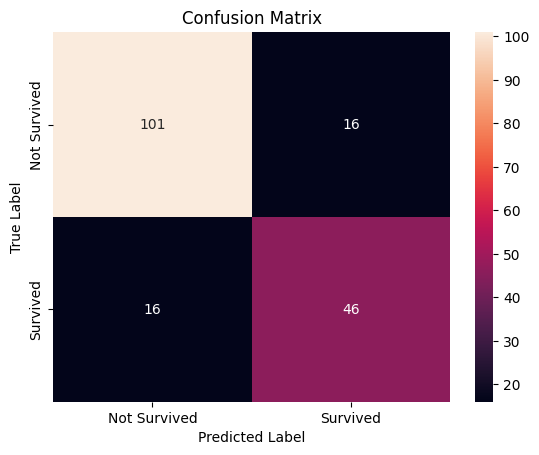

In [28]:
# Step 4: Visualize the confusion matrix for the model
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()